In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
#check the first 5 samples
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#reshape the y_train
y_train = y_train.reshape(-1,)
y_train[:5]
y_test = y_test.reshape(-1,)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
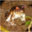

In [ ]:
X_train[0]

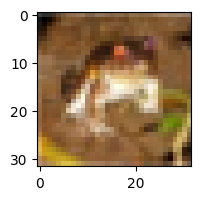

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

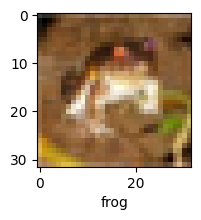

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
#normalizing and bringing to [0,1]
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3825 - loss: 1.6898
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5920 - loss: 1.1569
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6500 - loss: 1.0075
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6811 - loss: 0.9148
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7148 - loss: 0.8254
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7326 - loss: 0.7717
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7494 - loss: 0.7184
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7647 - loss: 0.6696
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7773 - loss: 0.6381
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7949 - loss: 0.5917


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7005 - loss: 0.9254


[0.9399709105491638, 0.6983000040054321]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.2900082e-05, 4.9686434e-05, 3.4656152e-04, 4.0245593e-01,
        5.2876258e-05, 5.8799243e-01, 1.4614043e-03, 1.4997673e-05,
        7.5413221e-03, 6.1870625e-05],
       [8.4382325e-04, 8.0327532e-04, 7.7972400e-06, 1.7979005e-07,
        1.5861977e-08, 3.1921457e-09, 6.5511285e-10, 1.3062370e-08,
        9.9834001e-01, 4.9269756e-06],
       [9.3130946e-02, 2.7351505e-01, 4.4330126e-03, 1.9774402e-02,
        9.6460688e-04, 2.9179265e-03, 2.8995544e-04, 3.0662233e-04,
        5.8905184e-01, 1.5615617e-02],
       [9.7093290e-01, 2.9191948e-03, 4.1946680e-03, 3.1692348e-04,
        2.3676762e-04, 4.3322016e-06, 3.7406244e-05, 1.0870982e-05,
        2.1256428e-02, 9.0546819e-05],
       [3.7640046e-07, 2.6456069e-05, 1.9853685e-02, 4.0057406e-02,
        1.8830118e-01, 2.4469816e-03, 7.4650079e-01, 2.2159488e-06,
        2.8109322e-03, 4.0530086e-08]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(5), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

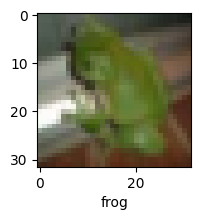

In [ ]:
plot_sample(X_test, y_test, 7)

In [ ]:
classes[y_classes[7]]

'frog'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification report:\n",classification_report(y_test, y_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.73      0.90      0.81      1000
           2       0.61      0.57      0.59      1000
           3       0.53      0.46      0.49      1000
           4       0.63      0.67      0.65      1000
           5       0.61      0.61      0.61      1000
           6       0.76      0.80      0.78      1000
           7       0.79      0.73      0.76      1000
           8       0.76      0.82      0.79      1000
           9       0.85      0.69      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
# pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0
